In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib
# matplotlib.use('pgf')

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
import numpy as np

%matplotlib inline


c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

markerlist = ['o', 4, 5, 6, 7, 'p', 'd', 'P']


text_width = 5.5  # in  --> Confirmed with template explanation
text_height = 9.0

fs_m1 = 7  # for figure ticks
fs = 9  # for regular figure text
fs_p1 = 10  # figure titles

axes_lw = 0.7

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('axes', linewidth=axes_lw)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

matplotlib.rc('text', usetex=True)

plt.rcParams.update({'text.latex.preamble': r'\usepackage{amsfonts}'})


def errorfill(ax, x, y, yerr, color=None, alpha_fill=0.3, alpha_line=1, lw=1, linestyle='-', fill_linewidths=0.2, marker=None, markersize=1, label=None):
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=alpha_fill, linewidths=fill_linewidths)
    ax.plot(x, y, color=color, lw=lw, linestyle=linestyle, alpha=alpha_line, label=label, marker=marker, markersize=markersize)

def remove_xticks(ax):
    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
    ax.xaxis.set_tick_params(which='minor', bottom=False, top=False)
    ax.xaxis.set_tick_params(which='major', bottom=False, top=False)
    ax.set_xticklabels([])
        
def remove_yticks(ax):
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
    ax.yaxis.set_tick_params(which='minor', left=False)
    ax.set_yticklabels([])


In [4]:
from scalable_gps.wandb_utils import load_runs_from_regex
import numpy as np
import os

def get_splits(dataset, model):
    # if dataset == '3droad':
    #     return [0, 1, 2, 4, 5, 6, 7, 8, 9]
    # elif (dataset == 'song' or dataset =='houseelectric') and 'cg' in model:
    #     return [0, 1, 2, 3, 4]
    # elif dataset == 'buzz' and model == 'precondcg':
    #     return [0, 1, 2, 3, 4]
    if dataset in ['song', 'buzz', 'houseelectric']:
        return [0, 1, 2, 3, 4]
    elif dataset == '3droad':
        return [0, 1, 2, 4]
    else:
        return [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def get_n_steps(dataset, model):
    if dataset in ['kin40k', 'song', 'buzz', 'houseelectric'] and model == 'sgd':
        return 100
    elif dataset in ['song', 'buzz', 'houseelectric'] and 'cg' in model:
        return 100
    else:
        return 1000

datasets = ['pol',
            # 'elevators',
            # 'bike',
            # 'kin40k',
            # 'protein',
            'keggdirected',
            '3droad',
            # 'song',
            # 'buzz',
            'houseelectric']
models = ['sgd', 'cg', 'precondcg']

config_keys = ['dataset_config.split', 'model_name', 'compute_exact_soln']
metric_keys = ['wall_clock_time', 'train/normalised_test_rmse', 'train/test_rmse']

rmse_trace_path = "./rmse_trace.npy"

if os.path.isfile(rmse_trace_path):
    rmse_trace = np.load(rmse_trace_path, allow_pickle=True).item()
# else:
#     rmse_trace = dict()

# for dataset in datasets:
#     if dataset not in rmse_trace.keys():
#         rmse_trace[dataset] = dict()

#     for model in models:
#         if model in rmse_trace[dataset].keys():
#             print(f"rmse trace for {dataset}, {model} already exists")
#             continue
#         splits = get_splits(dataset, model)
#         n_steps = get_n_steps(dataset, model)
#         seed_regex = f"({splits})".replace(", ", "|")
#         n_splits = len(splits)
#         rmse_trace[dataset][model] = dict()

#         for metric in metric_keys:
#             rmse_trace[dataset][model][metric] = np.zeros((n_splits, n_steps))
    
#         regex = f"^final_{dataset}_{model}_{seed_regex}$"
        
#         print(f"Downloading results for {dataset}, {model}")
#         configs_and_metrics = load_runs_from_regex(regex, config_keys=config_keys, metric_keys=metric_keys)

#         for (configs, metrics) in configs_and_metrics:
#             if configs['compute_exact_soln']:
#                 continue
#             split = splits.index(configs['dataset_config.split'])
#             assert model == configs['model_name']

#             for metric in metric_keys:
#                 rmse_trace[dataset][model][metric][split] = metrics[metric]
#         # np.save(rmse_trace_path, rmse_trace)

In [5]:
from scalable_gps.wandb_utils import load_runs_from_regex
import numpy as np
import os

def get_splits(dataset):
    if dataset == '3droad':
        return [0, 1, 2, 4]
    elif dataset == 'houseelectric':
        return [0, 1, 2]
    else:
        return [0, 1, 2, 3, 4]

def get_n_steps(dataset, model):
    if model == 'sgd':
        if dataset in ['3droad']:
            return 1000
        else:
            return 100
    elif 'cg' in model:
        if dataset in ['song', 'buzz', 'houseelectric']:
            return 100
        else:
            return 1000

datasets = ['pol',
            # 'elevators',
            # 'bike',
            # 'kin40k',
            # 'protein',
            'keggdirected',
            '3droad',
            # 'song',
            # 'buzz',
            'houseelectric']
models = ['sgd', 'cg']

config_keys = ['dataset_config.split', 'model_name', 'compute_exact_soln', 'sampling_config.eval_every']
metric_keys = ['normalised_test_llh', 'test_llh']

llh_trace_path = "./llh_trace.npy"

if os.path.isfile(llh_trace_path):
    llh_trace = np.load(llh_trace_path, allow_pickle=True).item()
# else:
#     llh_trace = dict()

# for dataset in datasets:
#     if dataset not in llh_trace.keys():
#         llh_trace[dataset] = dict()
    
#     splits = get_splits(dataset)

#     for model in models:
#         if model in llh_trace[dataset].keys():
#             print(f"llh trace for {dataset}, {model} already exists")
#             continue

#         n_steps = get_n_steps(dataset, model)
#         seed_regex = f"({splits})".replace(", ", "|")
#         n_splits = len(splits)
#         llh_trace[dataset][model] = dict()

#         for metric in metric_keys:
#             llh_trace[dataset][model][metric] = np.zeros((n_splits, n_steps))
    
#         regex = f"samples_final_{dataset}_{model}_{seed_regex}$"
        
#         print(f"Downloading results for {dataset}, {model}")
#         configs_and_metrics = load_runs_from_regex(regex, config_keys=config_keys, metric_keys=metric_keys)

#         for (configs, metrics) in configs_and_metrics:
#             if configs['compute_exact_soln']:
#                 continue
#             if dataset == '3droad' and model =='sgd' and configs['sampling_config.eval_every'] != 100:
#                 continue
#             if dataset == 'houseelectric' and model =='sgd' and configs['sampling_config.eval_every'] != 1000:
#                 continue
#             split = splits.index(configs['dataset_config.split'])
#             assert model == configs['model_name']
#             print(dataset, model, split)

#             for metric in metric_keys:
#                 llh_trace[dataset][model][metric][split] = metrics[metric][:n_steps]
#         # np.save(llh_trace_path, llh_trace)

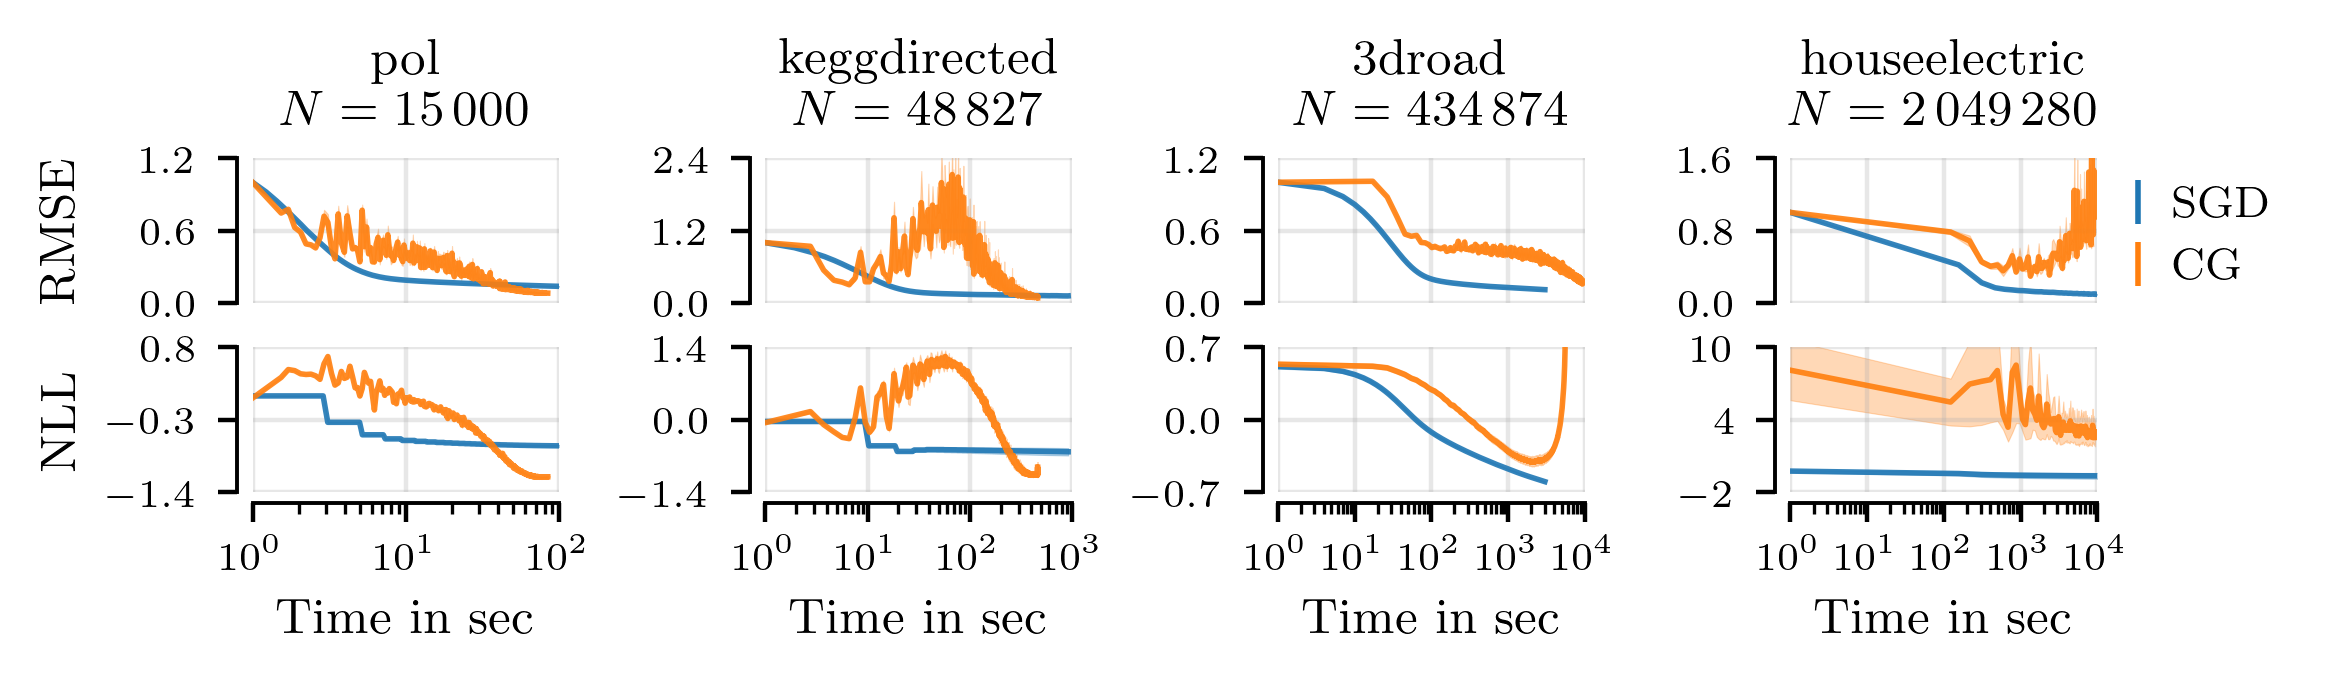

In [13]:
def get_color(model):
    if 'cg' in model:
        return 'tab:orange'
    elif 'sgd' in model:
        return 'tab:blue'
    else:
        return 'magenta'

def get_label(model):
    if 'cg' in model:
        return "CG"
    elif 'sgd' in model:
        return "SGD"
    else:
        return 'null'
    
def get_yticks(dataset):
    if dataset == 'pol':
        return [(0.0, 0.6, 1.2),
                (-1.4, -0.3, 0.8)]
    elif dataset == 'keggdirected':
        return [(0, 1.2, 2.4),
                (-1.4, 0.,  1.4)]
    elif dataset == '3droad':
        return [(0, 0.6, 1.2),
                (-.7, 0.0, 0.7)]
    elif dataset == 'houseelectric':
        return [(0, 0.8, 1.6),
                (-2, 4, 10)]
    else:
        return [(0, 1), (0, 1)]

alpha_line = 0.9

titles = ["test rmse", "y pred rmse", "alpha rmse in eucl", None, "alpha rmse in rkhs", None]
metrics = ['train/normalised_test_rmse', 'normalised_test_llh']
models = ['sgd', 'cg']

S = 'pol'
M = 'keggdirected'
L = '3droad'
XL = 'houseelectric'

fig = plt.figure(dpi=400, figsize=[text_width, 0.2 * text_height])
gs = GridSpec(2, 4, figure=fig)

S_rmse = fig.add_subplot(gs[0, 0])
S_llh = fig.add_subplot(gs[1, 0])
M_rmse = fig.add_subplot(gs[0, 1])
M_llh = fig.add_subplot(gs[1, 1])
L_rmse = fig.add_subplot(gs[0, 2])
L_llh = fig.add_subplot(gs[1, 2])
XL_rmse = fig.add_subplot(gs[0, 3])
XL_llh = fig.add_subplot(gs[1, 3])

# add pol, N = 100 ...
# S_rmse.set_title(r"\\textsc{pol}" + "\n" + r"$N = 15000$")#, D = 26")
# M_rmse.set_title(r"\\textsc{keggdirected}" + "\n" + r"$N = 48827$")#, D = 20")
# L_rmse.set_title(r"\\textsc{3droad}" + "\n" + r"$N = 434874$")#, D = 3")
# XL_rmse.set_title(r"\\textsc{houseelectric}" + "\n" + r"$N = 2049280$")#, D = 11")
S_rmse.set_title("pol\n" + r"$N = 15\,000$")#, D = 26")
M_rmse.set_title("keggdirected\n" + r"$N = 48\,827$")#, D = 20")
L_rmse.set_title("3droad\n" + r"$N = 434\,874$")#, D = 3")
XL_rmse.set_title("houseelectric\n" + r"$N = 2\,049\,280$")#, D = 11")


axes_rmse = [S_rmse, M_rmse, L_rmse, XL_rmse]
axes_llh = [S_llh, M_llh, L_llh, XL_llh]
axes = axes_rmse + axes_llh

S_rmse.set_ylabel("RMSE")
S_llh.set_ylabel("NLL")

for i, ax in enumerate(axes):
    ax.grid(alpha=0.3)
    ax.semilogx()
    ax.set_xlabel("Time in sec")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

    ax.spines[['top', 'right']].set_visible(False)
    ax.spines['bottom'].set_position(('axes', -0.075))
    ax.spines['left'].set_position(('axes', -0.05))

for i, (dataset, max_time) in enumerate(zip([S, M, L, XL], [100, 1000, 10000, 10000])):
    xlim = (1, max_time)
    yticks_rmse, yticks_llh = get_yticks(dataset)
    for metric, ax, trace, yticks, sgn in zip(metrics, [axes_rmse, axes_llh], [rmse_trace, llh_trace], [yticks_rmse, yticks_llh], [1, -1]):
        for model in models:
            time = rmse_trace[dataset][model]['wall_clock_time'][0]
            time = time - time[0] + xlim[0]
            c = get_color(model)
            
            ax[i].set_xlim(xlim)
            if max_time == 10000:
                ax[i].set_xticks([1, 10, 100, 1000, 10000])
            ax[i].set_yticks(yticks)
            ax[i].set_ylim(np.min(yticks), np.max(yticks))

            mean = sgn * np.mean(trace[dataset][model][metric], axis=0)
            err = np.std(trace[dataset][model][metric], axis=0) / np.sqrt(trace[dataset][model][metric].shape[0])
            stretch_factor = int(len(time) / len(mean))
            mean = np.repeat(mean, stretch_factor)
            err = np.repeat(err, stretch_factor)
            # print(dataset, model, stretch_factor)
            errorfill(ax[i], time, mean, err, color=c, alpha_line=alpha_line)

for ax in axes_rmse:
    ax.spines['bottom'].set_visible(False)
    remove_xticks(ax)
    ax.set_xlabel(None)

legend_handles = []
for model in models:
    c = get_color(model)
    label = get_label(model)
    legend_handles.append(Line2D([], [], marker='|', linestyle='None', markersize=8, markeredgewidth=1, color=c, label=label))
    # legend_handles.append(Line2D([], [], color=c, label=label))
# fig.legend(handles=legend_handles, ncols=1, loc='center', bbox_to_anchor=(1.01, 0.65), fontsize=8, frameon=False, rotation=90)
fig.legend(handles=legend_handles, ncols=1, loc='center', bbox_to_anchor=(1.01, 0.65), fontsize=8, frameon=False, handlelength=0)

fig.align_labels()
fig.tight_layout(w_pad=0.5, h_pad=0.2)
fig.savefig(f"../../figures/rmse_llh_trace.pdf", bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../../figures/rmse_llh_trace.png", bbox_inches='tight', pad_inches=0.01)